In [13]:
#COMP 379, Machine Learning Final Project
#Angie Georgaras, Paulina Adamski, Swaeta Sekharan, Daniella Pombo

#for data import and visualization
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
colors = ["#800000", "#45ada8", "#2a363b", "#fecea8", "#99b898", "#e5fcc2"]
sns.set_palette(sns.color_palette(colors))


#For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#For models
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [14]:
breast_data = pd.read_csv('./data/data.csv')
#breast_data = breast_data.drop(['id','Unnamed: 32'],axis=1)

In [15]:
#randomize data ?

In [16]:
#drop diagnosis, create X and Y
y = breast_data['diagnosis']
x = breast_data.drop('diagnosis', axis=1)

In [17]:
#replace M and B with 1s and 0s
y = y.replace(['M', 'B'], [1, 0])
columns = x.columns

x = x.replace(0, np.nan)

#replace missing values with mean
for col in x.columns:
    x[col].fillna(x[col].mean(), inplace=True)

#standardize the dataset to have a mean of 0, allows us to compare different scales
scaler = StandardScaler()
standardized_data = x.copy()

standardized_data[columns] = pd.DataFrame(scaler.fit_transform(standardized_data[columns]))


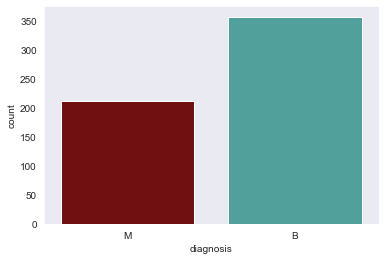

In [18]:
#data visualization + feature selection
diagnoses=sns.countplot(x='diagnosis', data=breast_data)

In [19]:
breast_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


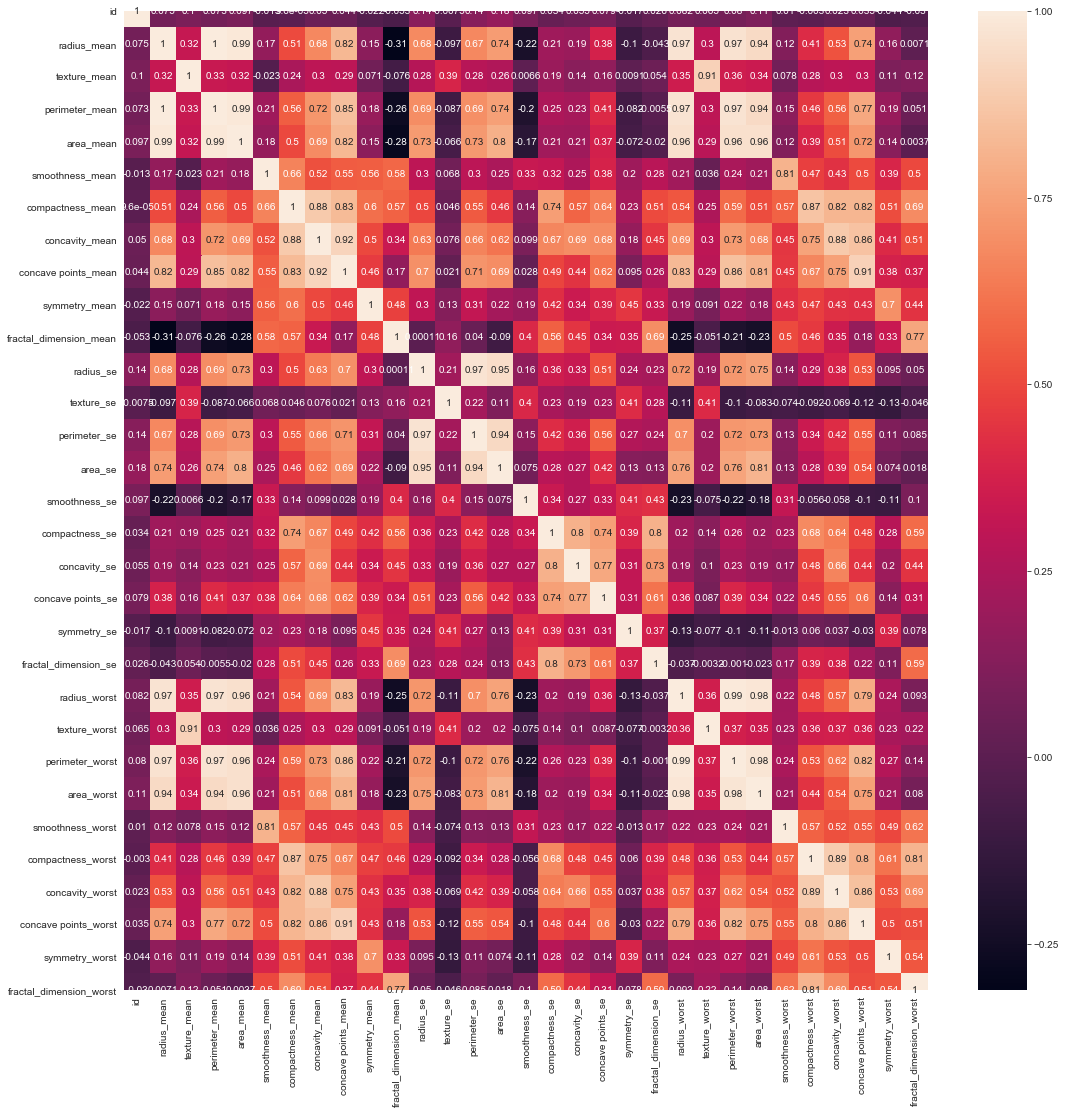

In [20]:
plt.subplots(figsize=(18, 18))
sns.heatmap(breast_data.corr(), annot=True);

In [21]:
#split the dataset, 70% training, 15% test, 15% development

X_train, X_test1, y_train, y_test1 = train_test_split(x, y,test_size=0.3)
X_dev, X_test, y_dev, y_test = train_test_split(X_test1, y_test1,test_size=0.5)